### DL for IMDb dataset
We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

he IMDB sentiment classification dataset consists of 50,000 movie reviews from IMDB users that are labeled as either positive (1) or negative (0). The reviews are preprocessed and each one is encoded as a sequence of word indexes in the form of integers. The words within the reviews are indexed by their overall frequency within the dataset. For example, the integer “2” encodes the second most frequent word in the data. The 50,000 reviews are split into 25,000 for training and 25,000 for testing.

The dataset was created by researchers at Stanford University and published in a 2011 paper, where they achieved 88.89% accuracy. It was also used within the “Bag of Words Meets Bags of Popcorn” Kaggle competition in 2011.


### overfitting and underfitting for imdb dataset
The issue in ML is the tension between Optimization and generalization. Optimization is the process of adjusting a model to get the best possible performance.

### How did we find ovrfitting in thsi section?


We will be reviewing overfitting scenerio in this section:
##### Reducing the network size. 
here we are Comparing original [16.16,1], smaller [4,4,1] and bigger model [521,521,1]. We noticed that the smaller model worked better. intuitively, a model with more parameters will have more memorising capacity and therefore will eb able to easily learn a perfect dictionary like mapping between training samples and their target, a mapping without generalization power


##### Adding weight regularization: 
in this we are putting constraints on the complexity of the network by forcing its weights to only take small values, whihc makes the distribution of weights more regular. this is called weight regularization. This can be done by dding to the loss function of the network a cost associated with having large weights.

##### Adding droputs
This technique may seem strange and arbitrary. Why would this help reduce overfitting? Geoff Hinton has said that he was inspired, among other things, by a fraud prevention mechanism used by banks -- in his own words: "I went to my bank. The tellers kept changing and I asked one of them why. He said he didn’t know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud the bank. This made me realize that randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting".

The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that are not significant (what Hinton refers to as "conspiracies"), which the network would start memorizing if no noise was present.


### Summary: To prevent overfititng in neural networks following are the standard techniques:
1. Getting more training data.
2. Reducing the capacity of the network.
3. Adding weight regularization.
4. Adding dropout.

In [89]:
from keras.datasets import imdb
import tensorflow as tf
from tensorflow.keras import Sequential, Model, Input, regularizers
from tensorflow.keras.layers import Dense, ReLU, Activation, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, ZeroPadding2D

import numpy as np
import matplotlib.pyplot as plt

In [14]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [15]:
print('train data ', len(train_data))
print('test data ', len(test_data))


train data  25000
test data  25000


Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

In [4]:
print(max([max(sequence) for sequence in train_data]))
'''
for sequence in train_data:
    print(max(sequence))'''

9999


'\nfor sequence in train_data:\n    print(max(sequence))'

we can easily map these decode these reviews back to english

In [5]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


In [14]:
help(word_index.items)

Help on built-in function items:

items(...) method of builtins.dict instance
    D.items() -> a set-like object providing a view on D's items



In [11]:
word_map = dict([(value,key) for (key, value) in word_index.items()])

In [19]:
decoded_review = []
for i in train_data[0]:
    print(word_map.get(i-3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [25]:
' '.join([word_map.get(i-3, '-') for i in train_data[0]])

"- this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert - is an amazing actor and now the same being director - father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for - and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also - to the two little boy's that played the - of norman and paul they were just brilliant children are often left out of the - list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Data preparation

right now the data is in form of list, we need to turn it to tensor. 
we can use one hot encoder, that will convvert them into vectors of 0's and 1's. example: this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.

In [16]:
# dimensions = 10000
def vectorizing(inputs, dim=10000):
    output= np.zeros((len(inputs), dim))
    for i, inp in enumerate(inputs):
        #giving 1 to all the elements whcich are present in the data
        output[i, inp] = 1
        return output

In [17]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
x_train = vectorizing(train_data)
x_test = vectorizing(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [19]:
print(x_test.shape)
print(len(y_train))

(25000, 10000)
25000


In [20]:
dd = (x_test[0]- x_test[1])
print(np.where(dd != 0))
print(dd[11])

(array([   1,    2,    4,    5,    6,    7,    8,    9,   10,   13,   14,
         16,   23,   25,   27,   28,   29,   31,   32,   38,   46,   89,
         92,  100,  123,  124,  157,  170,  177,  179,  202,  220,  239,
        286,  354,  360,  394,  451,  468,  488,  591,  717, 1035, 1668,
       5760, 7479, 7944], dtype=int64),)
0.0


In [22]:
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(10000,)))

# Add one hidden layer 
# after the first layer, you don't need to specify
# the size of the input anymore:
model.add(Dense(16, activation='relu'))


# Add an output layer 
# we used sigmond actication unction here so that the output is probability
# score si between 0 to 1, indicating how likely is teh varible to have red wine or white wine
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [26]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.6861 - val_accuracy: 0.8648
Epoch 2/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.7221 - val_accuracy: 0.8654
Epoch 3/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.7422 - val_accuracy: 0.8651
Epoch 4/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.7724 - val_accuracy: 0.8635
Epoch 5/20
15000/15000 [==============================] - 2s 155us/step - loss: 8.9598e-04 - accuracy: 0.9999 - val_loss: 0.7937 - val_accuracy: 0.8631
Epoch 6/20
15000/15000 [==============================] - 2s 155us/step - loss: 6.7996e-04 - accuracy: 1.0000 - val_loss: 0.8364 - val_accuracy: 0.8637
Epoch 7/20
15000/15000 [==============================

In [57]:
history_dict = history.history
print(history_dict.keys())

accuracy = history.history['acc']
val_loss = history.history['val_loss']
loss = history.history['loss']
val_acc = history.history['val_acc']

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


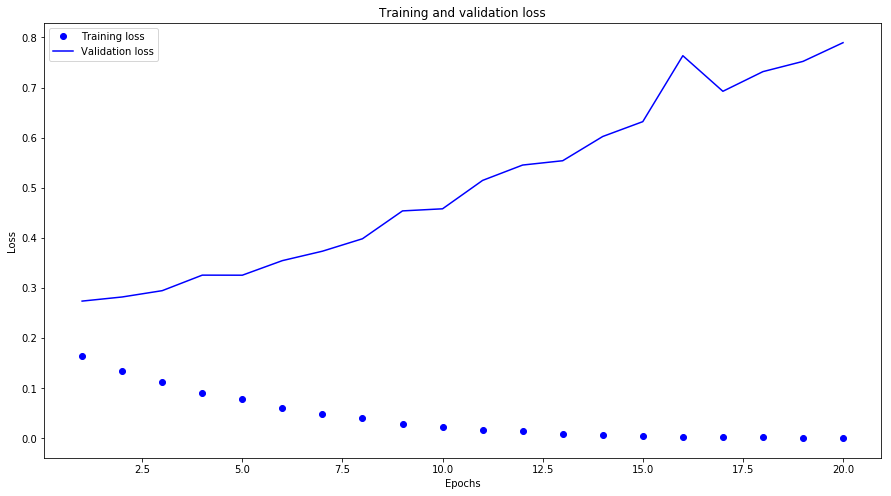

In [59]:
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(15,8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

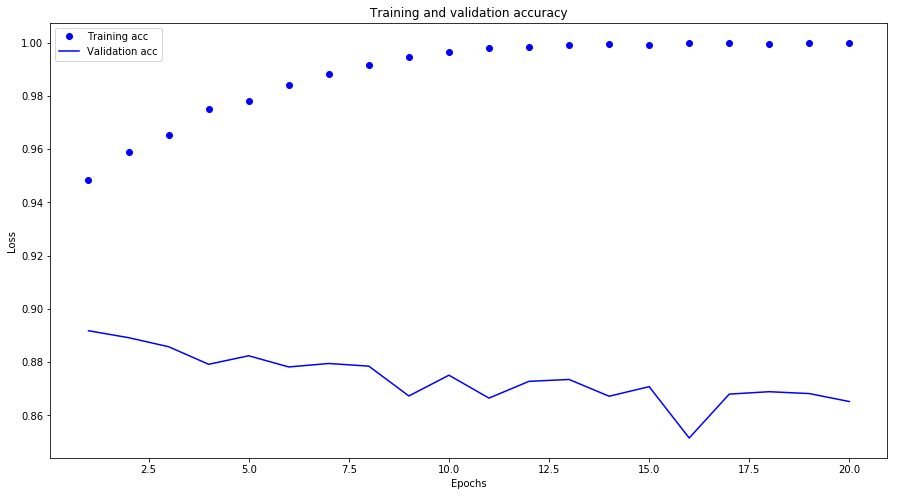

In [61]:
plt.figure(figsize=(15,8))
plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As you can see, the training loss decreases with every epoch and the training accuracy increases with every epoch. That's what you would expect when running gradient descent optimization -- the quantity you are trying to minimize should get lower with every iteration. But that isn't the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we were warning against earlier: a model that performs better on the training data isn't necessarily a model that will do better on data it has never seen before. In precise terms, what you are seeing is "overfitting": after the second epoch, we are over-optimizing on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

In this case, to prevent overfitting, we could simply stop training after three epochs. In general, there is a range of techniques you can leverage to mitigate overfitting, which we will cover in the next chapter.

In [57]:
model = Sequential()
model.add(Dense(16, input_shape = (10000, ), activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size=512)
results = model.evaluate(x_test,y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 4s 161us/sample - loss: 0.4718 - acc: 0.8185
Epoch 2/4
25000/25000 [==============================] - 3s 101us/sample - loss: 0.2687 - acc: 0.9080
Epoch 3/4
25000/25000 [==============================] - 3s 102us/sample - loss: 0.2049 - acc: 0.9274
Epoch 4/4
25000/25000 [==============================] - 5s 209us/sample - loss: 0.2947 - acc: 0.8832
[0.29469839240550993, 0.88324]


In [64]:
model.predict(x_test)

array([[0.10251948],
       [0.9983188 ],
       [0.7473016 ],
       ...,
       [0.06337675],
       [0.04695469],
       [0.5187792 ]], dtype=float32)

#### More experiments with model

1. trying using just 1/ 3 hidden layer

In [65]:
model = Sequential()
model.add(Dense(32, input_shape = (10000, ), activation = 'relu'))
#model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size=512)
results_e1 = model.evaluate(x_test,y_test)

print(results)

Epoch 1/4
25000/25000 [==============================] - 3s 117us/sample - loss: 0.4316 - acc: 0.8305
Epoch 2/4
25000/25000 [==============================] - 3s 111us/sample - loss: 0.2590 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 3s 111us/sample - loss: 0.2040 - acc: 0.9295
Epoch 4/4
25000/25000 [==============================] - 3s 107us/sample - loss: 0.2846 - acc: 0.8873
[0.28456193967819216, 0.88732]


In [66]:
model = Sequential()
model.add(Dense(32, input_shape = (10000, ), activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size=512)
results_e2 = model.evaluate(x_test,y_test)

print(results)

Epoch 1/4
25000/25000 [==============================] - 3s 121us/sample - loss: 0.4496 - acc: 0.8126
Epoch 2/4
25000/25000 [==============================] - 3s 110us/sample - loss: 0.2457 - acc: 0.9107
Epoch 3/4
25000/25000 [==============================] - 3s 110us/sample - loss: 0.1927 - acc: 0.9286
Epoch 4/4
25000/25000 [==============================] - 3s 109us/sample - loss: 0.3058 - acc: 0.8821
[0.28456193967819216, 0.88732]


In [40]:
def build_model(filters):
    tot_filt = len(filters)
    print(tot_filt)
    # adding the input layer
    model = Sequential()
    model.add(Dense(filters[0], activation='relu', input_shape=(10000,)))
    # adding dense layer
    for i in range(1, tot_filt-1):
        print(i, filters[i])
        model.add(Dense(filters[i], activation = 'relu'))
        
    model.add(Dense(filters[tot_filt-1], activation='softmax'))
    # adding the compiler
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [62]:
model1 = Sequential()
model1.add(Dense(16, activation='relu', input_shape=(10000,)))
# Add one hidden layer 
# after the first layer, you don't need to specify
# the size of the input anymore:
model1.add(Dense(16, activation='relu'))

# Add an output layer 
# we used sigmond actication unction here so that the output is probability
# score si between 0 to 1, indicating how likely is teh varible to have red wine or white wine
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_63 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Trying to unerstand how to avoid overfitting here 

### Reducing the network's size

In [66]:
# building a regular model with filters [16,16,1]
model_original = Sequential()
model_original.add(Dense(16, activation='relu', input_shape=(10000,)))
# Add one hidden layer 
# after the first layer, you don't need to specify
# the size of the input anymore:
model_original.add(Dense(16, activation='relu'))

# Add an output layer 
# we used sigmond actication unction here so that the output is probability
# score si between 0 to 1, indicating how likely is teh varible to have red wine or white wine
model_original.add(Dense(1, activation='sigmoid'))

model_original.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
model_original.summary()
original_hist = model_original.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_69 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 197us/sample - loss: 0.4579 - acc: 0.8197 - val_loss: 0.3465 - val_acc: 0.8704
Epoch 2/20
25000/25000 [==============================] - 5s 180us/sample - loss: 0.2590 - acc: 0.9090 - val_loss: 0.2853 - val_acc: 0.8898
Epoch 3/20
25000/25000 [==============================] - 4s 178us/sam

In [67]:
model_small = Sequential()
model_small.add(Dense(4, activation='relu', input_shape=(10000,)))
# Add one hidden layer 
# after the first layer, you don't need to specify
# the size of the input anymore:
model_small.add(Dense(4, activation='relu'))

# Add an output layer 
# we used sigmond actication unction here so that the output is probability
# score si between 0 to 1, indicating how likely is teh varible to have red wine or white wine
model_small.add(Dense(1, activation='sigmoid'))

model_small.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
model_small.summary()
small_hist = model_small.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_72 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 189us/sample - loss: 0.5183 - acc: 0.8105 - val_loss: 0.4217 - val_acc: 0.8671
Epoch 2/20
25000/25000 [==============================] - 4s 163us/sample - loss: 0.3421 - acc: 0.8930 - val_loss: 0.3350 - val_acc: 0.8814
Epoch 3/20
25000/25000 [==============================] - 4s 164us/sampl

In [82]:
model_big = Sequential()
model_big.add(Dense(512, activation='relu', input_shape=(10000,)))
# Add one hidden layer 
# after the first layer, you don't need to specify
# the size of the input anymore:
model_big.add(Dense(512, activation='relu'))

# Add an output layer 
# we used sigmond actication unction here so that the output is probability
# score si between 0 to 1, indicating how likely is teh varible to have red wine or white wine
model_big.add(Dense(1, activation='sigmoid'))

model_big.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
model_big.summary()
big_hist = model_big.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_81 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 14s 540us/sample - loss: 0.4671 - acc: 0.8009 - val_loss: 0.2959 - val_acc: 0.8854
Epoch 2/20
25000/25000 [==============================] - 13s 522us/sample - loss: 0.2206 - acc: 0.9142 - val_loss: 0.2820 - val_acc: 0.8878
Epoch 3/20
25000/25000 [==============================] - 13s 52

In [83]:
big_hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [84]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
small_model_val_loss = small_hist.history['val_loss']
big_model_val_loss = big_hist.history['val_loss']

original_loss = original_hist.history['loss']
small_model_loss = small_hist.history['loss']
big_model_loss = big_hist.history['loss']

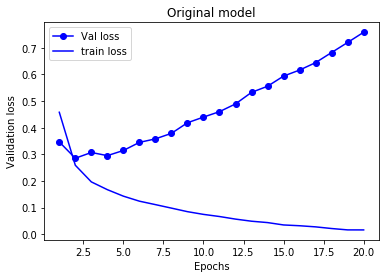

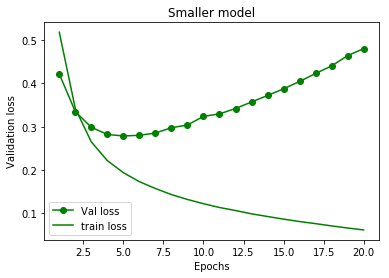

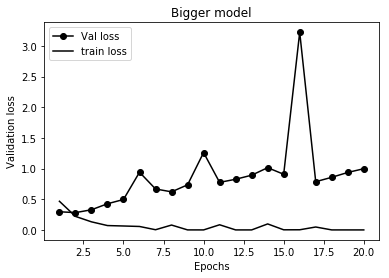

In [85]:
plt.figure()
plt.title('Original model')
plt.plot(epochs, original_val_loss, 'b-o', label='Val loss')
plt.plot(epochs, original_loss, 'b-', label='train loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.figure()
plt.title('Smaller model')
plt.plot(epochs, small_model_val_loss, 'g-o', label='Val loss')
plt.plot(epochs, small_model_loss, 'g-', label='train loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.figure()
plt.title('Bigger model')
plt.plot(epochs, big_model_val_loss, 'k-o', label='Val loss')
plt.plot(epochs, big_model_loss, 'k-', label='train loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

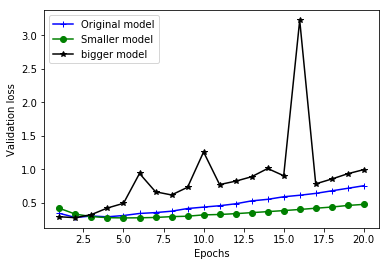

In [86]:
plt.plot(epochs, original_val_loss, 'b-+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, small_model_val_loss, 'g-o', label='Smaller model')
plt.plot(epochs, big_model_val_loss, 'k-*', label='bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In the above plot we can see that thte smaller network starts overfitting later than the reference one (original) and its performace degrades slowly compareed to the original one.

The bigger model is worse from the starting and overfits more severly and its validation loss is more noise. We can alos see theat the bigger model tends to go to zero training loss very quickly. hence it is more susceptible to overfitting (resulting in large difference between trainign and validation loss)

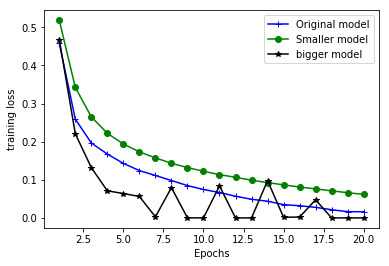

In [87]:
plt.plot(epochs, original_loss, 'b-+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, small_model_loss, 'g-o', label='Smaller model')
plt.plot(epochs, big_model_loss, 'k-*', label='bigger model')
plt.xlabel('Epochs')
plt.ylabel('training loss')
plt.legend()

plt.show()

## Adding weight regularization 

The simpler the model, better it is. One way to avoid overfitting is to put contraints on the complexity of a network by forcing its weights to take only smaller values, whcih makes the diftribution of weights more regular. and this is done by adding to the loss function the cost associated with having large weights. the cost come in two flavours:
        
            1. L1 regularization:here the cost added is proportional to the absolute value of the weights coefficients 
            2. L2 regularization: where the cost added is proportional to the square of the value of the weights 
                                    coefficients (weight decay)

In [91]:
l2_model = Sequential()
l2_model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu', input_shape=(10000,)))
l2_model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
l2_model.add(Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
l2_model.summary()
l2_model_hist = l2_model.fit(x_train, y_train,epochs=20,batch_size=512, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_87 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 205us/sample - loss: 0.5161 - acc: 0.8111 - val_loss: 0.3968 - val_acc: 0.8701
Epoch 2/20
25000/25000 [==============================] - 5s 187us/sample - loss: 0.3199 - acc: 0.9041 - val_loss: 0.3301 - val_acc: 0.8881
Epoch 3/20
25000/25000 [==============================] - 5s 184us/sam

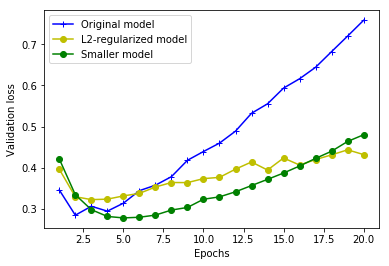

In [93]:
l2_model_val_loss = l2_model_hist.history['val_loss']
plt.plot(epochs, original_val_loss, 'b-+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'y-o', label='L2-regularized model')
plt.plot(epochs, small_model_val_loss, 'g-o', label='Smaller model')
#plt.plot(epochs, big_model_val_loss, 'k-*', label='bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

We can see that the model is workign fine here wit l2 regularization. The model is more resistant to overfitting than the reference model (original). 

### Adding dropout
Droput is most commonly used regularization techniques for neural network. Dropout applied to layer, randomly drops (set to zeros) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 
1.3, 0, 1.1]. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In [ ]:
# At training time: we drop out 50% of the units in the output
layer_output *= np.randint(0, high=2, size=layer_output.shape)


In [94]:
dpt_model = Sequential()
dpt_model.add(Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(16, activation='relu'))
dpt_model.add(Dropout(0.5))
dpt_model.add(Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [95]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 220us/sample - loss: 0.6202 - acc: 0.6389 - val_loss: 0.4729 - val_acc: 0.8543
Epoch 2/20
25000/25000 [==============================] - 5s 182us/sample - loss: 0.4696 - acc: 0.7919 - val_loss: 0.3500 - val_acc: 0.8810
Epoch 3/20
25000/25000 [==============================] - 4s 179us/sample - loss: 0.3796 - acc: 0.8524 - val_loss: 0.3081 - val_acc: 0.8860
Epoch 4/20
25000/25000 [==============================] - 5s 184us/sample - loss: 0.3207 - acc: 0.8861 - val_loss: 0.2832 - val_acc: 0.8867
Epoch 5/20
25000/25000 [==============================] - 5s 184us/sample - loss: 0.2804 - acc: 0.9057 - val_loss: 0.2873 - val_acc: 0.8870
Epoch 6/20
25000/25000 [==============================] - 5s 185us/sample - loss: 0.2454 - acc: 0.9179 - val_loss: 0.2892 - val_acc: 0.8850
Epoch 7/20
25000/25000 [==============================] - 4s 179us/sample - loss: 0.2242 - acc: 0.9254 - val_l

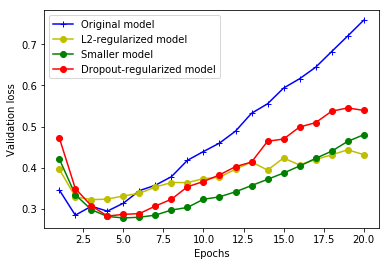

In [97]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b-+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'y-o', label='L2-regularized model')
plt.plot(epochs, small_model_val_loss, 'g-o', label='Smaller model')
plt.plot(epochs, dpt_model_val_loss, 'r-o', label='Dropout-regularized model')

#plt.plot(epochs, big_model_val_loss, 'k-*', label='bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()